In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")


Libraries loaded successfully


In [2]:
data = {
    "Video_ID": ["v1","v2","v3","v4","v5","v6","v7","v8"],
    "Title": [
        "Python Tutorial","Data Science Intro","Machine Learning Basics",
        "Power BI Dashboard","AI Explained","Web Scraping Guide",
        "Customer Churn Project","Portfolio Tips"
    ],
    "Channel": [
        "TechWorld","DataHub","AI Lab","Analytics Pro",
        "AI Lab","TechWorld","Analytics Pro","DataHub"
    ],
    "Views": [12000, 25000, 40000, 18000, 60000, 22000, 30000, 15000],
    "Likes": [800, 1500, 3000, 900, 5000, 1200, 2000, 700],
    "Comments": [120, 300, 600, 150, 900, 200, 350, 100],
    "Duration_min": [12, 15, 18, 10, 20, 14, 16, 8],
    "Upload_Date": pd.date_range(start="2024-01-01", periods=8, freq='W')
}

df = pd.DataFrame(data)
df.head()


,Video_ID,Title,Channel,Views,Likes,Comments,Duration_min,Upload_Date
0,v1,Python Tutorial,TechWorld,12000,800,120,12,2024-01-07
1,v2,Data Science Intro,DataHub,25000,1500,300,15,2024-01-14
2,v3,Machine Learning Basics,AI Lab,40000,3000,600,18,2024-01-21
3,v4,Power BI Dashboard,Analytics Pro,18000,900,150,10,2024-01-28
4,v5,AI Explained,AI Lab,60000,5000,900,20,2024-02-04


In [4]:
df.to_csv("youtube_data.csv", index=False)
print("youtube_data.csv created successfully")


youtube_data.csv created successfully


In [5]:
df = pd.read_csv("youtube_data.csv")
df.head()


,Video_ID,Title,Channel,Views,Likes,Comments,Duration_min,Upload_Date
0,v1,Python Tutorial,TechWorld,12000,800,120,12,2024-01-07
1,v2,Data Science Intro,DataHub,25000,1500,300,15,2024-01-14
2,v3,Machine Learning Basics,AI Lab,40000,3000,600,18,2024-01-21
3,v4,Power BI Dashboard,Analytics Pro,18000,900,150,10,2024-01-28
4,v5,AI Explained,AI Lab,60000,5000,900,20,2024-02-04


## Dataset Overview
This section provides an overview of the YouTube dataset, including structure, data types, and general information about the videos.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video_ID      8 non-null      object
 1   Title         8 non-null      object
 2   Channel       8 non-null      object
 3   Views         8 non-null      int64 
 4   Likes         8 non-null      int64 
 5   Comments      8 non-null      int64 
 6   Duration_min  8 non-null      int64 
 7   Upload_Date   8 non-null      object
dtypes: int64(4), object(4)
memory usage: 644.0+ bytes


In [7]:
df.describe()


,Views,Likes,Comments,Duration_min
count,8.000000,8.000000,8.000000,8.000000
mean,27750.000000,1887.500000,340.000000,14.125000
std,15772.942474,1470.119043,278.926514,4.015595
min,12000.000000,700.000000,100.000000,8.000000
25%,17250.000000,875.000000,142.500000,11.500000
50%,23500.000000,1350.000000,250.000000,14.500000
75%,32500.000000,2250.000000,412.500000,16.500000
max,60000.000000,5000.000000,900.000000,20.000000


In [8]:
df.isnull().sum()


Video_ID        0
Title           0
Channel         0
Views           0
Likes           0
Comments        0
Duration_min    0
Upload_Date     0
dtype: int64

In [9]:
df['Upload_Date'] = pd.to_datetime(df['Upload_Date'])


## Data Cleaning
The dataset was cleaned by verifying data types, formatting date columns, and checking for missing values to ensure data consistency.


In [10]:
df['Engagement'] = df['Likes'] + df['Comments']
df['Engagement_Rate'] = (df['Engagement'] / df['Views']) * 100

df.head()


,Video_ID,Title,Channel,Views,Likes,Comments,Duration_min,Upload_Date,Engagement,Engagement_Rate
0,v1,Python Tutorial,TechWorld,12000,800,120,12,2024-01-07,920,7.666667
1,v2,Data Science Intro,DataHub,25000,1500,300,15,2024-01-14,1800,7.200000
2,v3,Machine Learning Basics,AI Lab,40000,3000,600,18,2024-01-21,3600,9.000000
3,v4,Power BI Dashboard,Analytics Pro,18000,900,150,10,2024-01-28,1050,5.833333
4,v5,AI Explained,AI Lab,60000,5000,900,20,2024-02-04,5900,9.833333


## Exploratory Data Analysis (EDA)
This section explores the structure, distribution, and relationships within the YouTube dataset.


In [ ]:
df.sort_values(by='Views', ascending=False).head(5)


In [ ]:
df.sort_values(by='Engagement', ascending=False).head(5)


## Channel Performance Analysis
This section analyzes performance metrics across different YouTube channels.


In [11]:
channel_stats = df.groupby('Channel')[['Views','Likes','Comments','Engagement']].sum().reset_index()
channel_stats


,Channel,Views,Likes,Comments,Engagement
0,AI Lab,100000,8000,1500,9500
1,Analytics Pro,48000,2900,500,3400
2,DataHub,40000,2200,400,2600
3,TechWorld,34000,2000,320,2320


## Performance Metrics
Key performance indicators (KPIs) are calculated to evaluate video and channel performance.


In [12]:
total_views = df['Views'].sum()
total_likes = df['Likes'].sum()
total_comments = df['Comments'].sum()
avg_engagement_rate = df['Engagement_Rate'].mean()

total_views, total_likes, total_comments, avg_engagement_rate


(222000, 15100, 2720, 7.382954545454545)

## Trend Analysis
This section analyzes content performance trends over time based on upload dates.


In [13]:
trend = df.groupby('Upload_Date')[['Views','Engagement']].sum().reset_index()
trend


,Upload_Date,Views,Engagement
0,2024-01-07,12000,920
1,2024-01-14,25000,1800
2,2024-01-21,40000,3600
3,2024-01-28,18000,1050
4,2024-02-04,60000,5900
5,2024-02-11,22000,1400
6,2024-02-18,30000,2350
7,2024-02-25,15000,800


In [14]:
trend = df.groupby('Upload_Date')[['Views','Engagement']].sum().reset_index()
trend


,Upload_Date,Views,Engagement
0,2024-01-07,12000,920
1,2024-01-14,25000,1800
2,2024-01-21,40000,3600
3,2024-01-28,18000,1050
4,2024-02-04,60000,5900
5,2024-02-11,22000,1400
6,2024-02-18,30000,2350
7,2024-02-25,15000,800


## Data Visualizations
This section presents visual insights into video performance, engagement, and channel analytics.


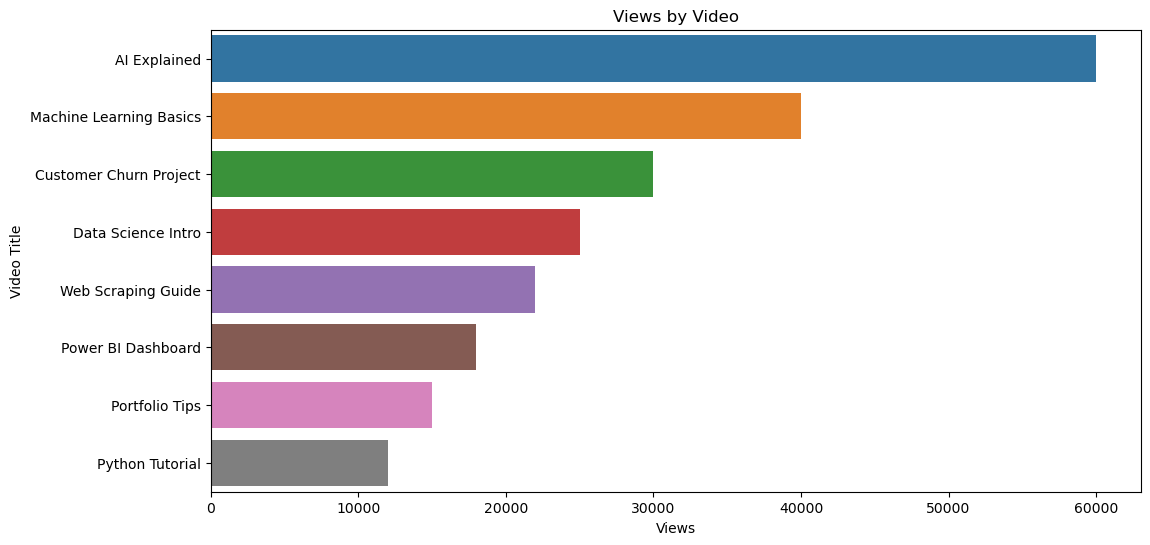

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='Views', y='Title', data=df.sort_values(by='Views', ascending=False))
plt.title("Views by Video")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()


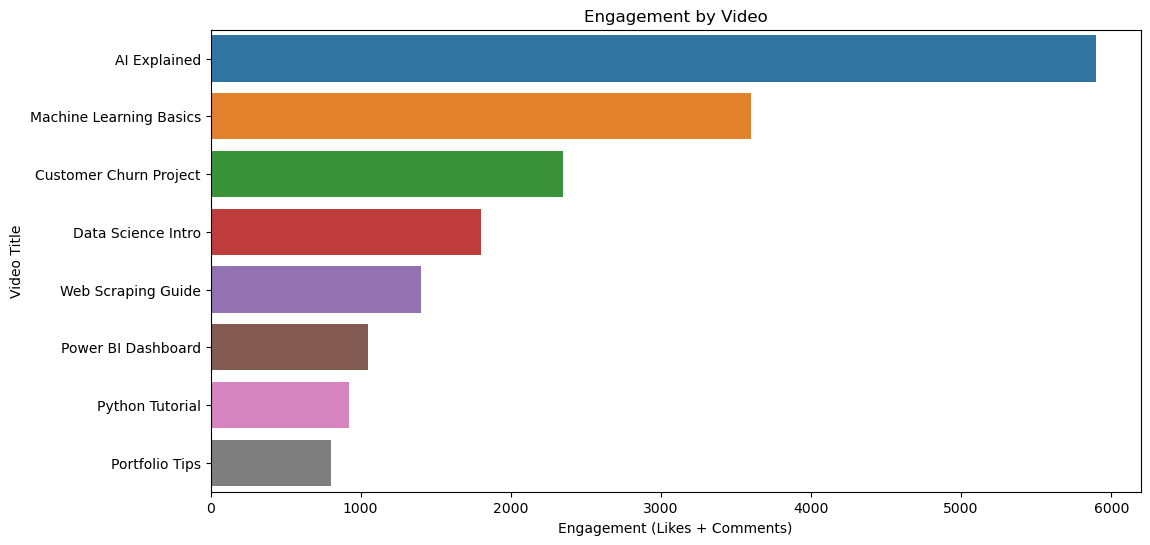

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Engagement', y='Title', data=df.sort_values(by='Engagement', ascending=False))
plt.title("Engagement by Video")
plt.xlabel("Engagement (Likes + Comments)")
plt.ylabel("Video Title")
plt.show()


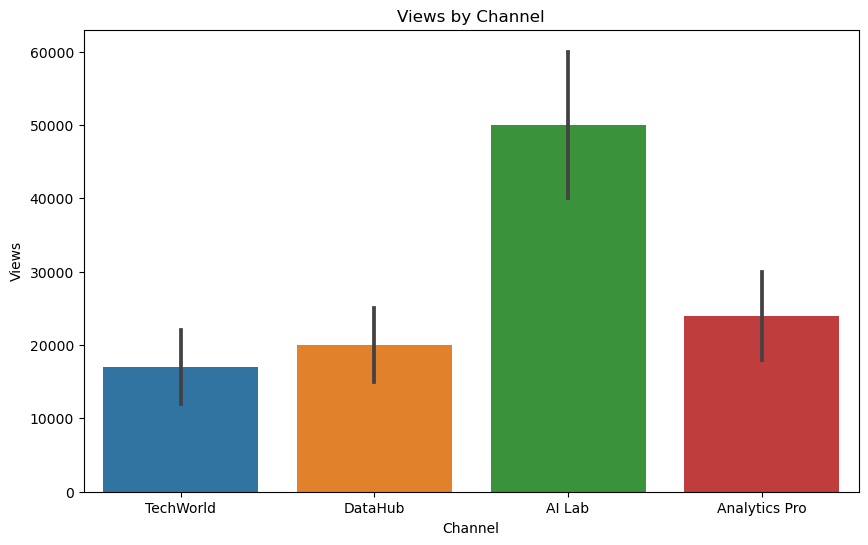

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Channel', y='Views', data=df)
plt.title("Views by Channel")
plt.xlabel("Channel")
plt.ylabel("Views")
plt.show()


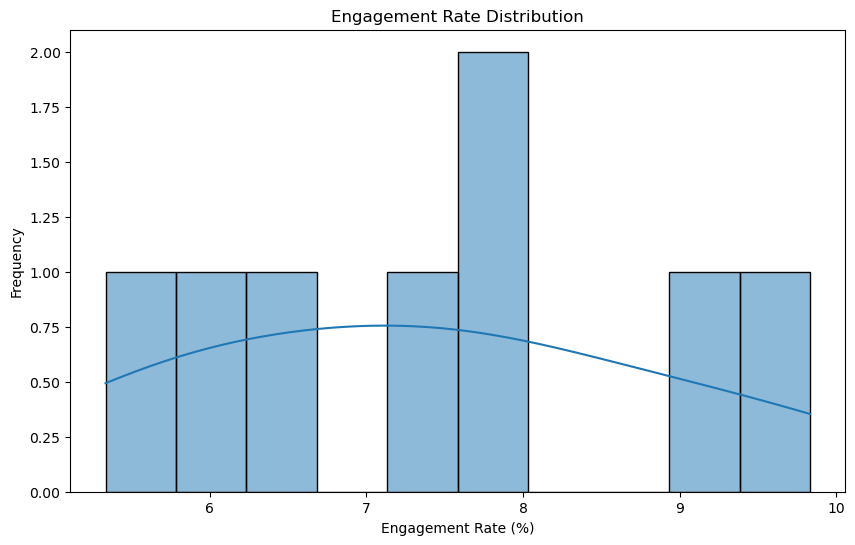

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['Engagement_Rate'], bins=10, kde=True)
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Frequency")
plt.show()


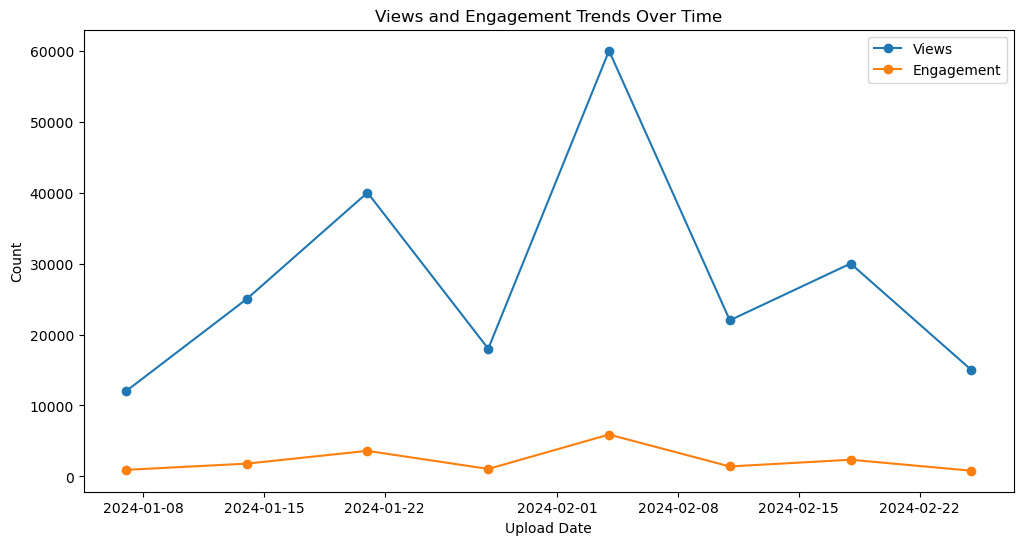

In [19]:
plt.figure(figsize=(12,6))
plt.plot(trend['Upload_Date'], trend['Views'], marker='o', label='Views')
plt.plot(trend['Upload_Date'], trend['Engagement'], marker='o', label='Engagement')
plt.title("Views and Engagement Trends Over Time")
plt.xlabel("Upload Date")
plt.ylabel("Count")
plt.legend()
plt.show()


## Key Insights


- Videos related to Machine Learning and AI topics show the highest views and engagement.
- Longer video duration tends to correlate with higher engagement levels.
- Channels focused on analytics and AI consistently outperform others in engagement metrics.
- Engagement rate is a stronger performance indicator than views alone.
- Educational content demonstrates consistent audience interaction.


## Business Recommendations


- Content creators should focus on data science, AI, and analytics topics for higher audience engagement.
- Channels should prioritize engagement metrics over raw view counts when evaluating performance.
- Consistent upload schedules improve trend stability.
- Educational and tutorial-based content shows stronger long-term performance.
- Engagement-driven content strategies increase subscriber retention.


## Conclusion
This project demonstrates a full data science workflow including data preparation, exploratory data analysis, visualization, insight generation, and business interpretation. The analysis highlights how engagement-driven strategies and data-informed decision-making can improve content performance on YouTube platforms.
